In [1]:
import numpy as np, analysis as ana, prjlib, basic, plottools as pl, binning as bins
from matplotlib.pyplot import *

In [2]:
# baseline
Lmin = 20
ver = 'v1'
dearot = 'True'
simn = 200
mb = bins.multipole_binning(10,spc='p2',lmin=Lmin,lmax=2048)
p0, __ = prjlib.filename_init(doreal='True',stype='lcmb',dearot=dearot,rlmin='200',rlmax='2048',ver=ver)
ocb0 = prjlib.binned_cl(p0.quad.f['EB'].cl[0],mb)
scb0 = prjlib.binned_cl_rlz(p0.quad.f['EB'].cl,1,simn,mb)

chi^2: 6.2 , chi^2 (sim): 10.5 , PTE: 0.78 (300,2048)
chi^2: 11.4 , chi^2 (sim): 10.5 , PTE: 0.34 (200,1948)
chi^2: 9.5 , chi^2 (sim): 10.5 , PTE: 0.56 (200,2148)


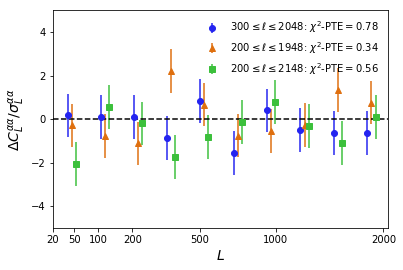

In [3]:
pl.plot_1dstyle(spc='p2',ylab=r'$\Delta C_L^{\alpha\alpha}/\sigma_L^{\alpha\alpha}$',xmin=Lmin,ymin=-5,ymax=5,xlabsize=14,ylabsize=14)
dat = {}
for i, (rlmin, rlmax, symbol) in enumerate([('300','2048','o'),('200','1948','^'),('200','2148','s')]):
    p1, __ = prjlib.filename_init(doreal='True',stype='lcmb',dearot=dearot,rlmin=rlmin,rlmax=rlmax,ver=ver)
    docb = prjlib.binned_cl(p1.quad.f['EB'].cl[0],mb) - ocb0
    dscb = prjlib.binned_cl_rlz(p1.quad.f['EB'].cl,1,simn,mb) - scb0
    dat[i] = dscb
    dmcb = np.mean(dscb,axis=0)
    dvcb = np.std(dscb,axis=0)
    st = ana.PTEs(docb,dscb,comment=str(rlmin)+','+str(rlmax))
    Label = r'$'+str(rlmin)+'\leq \ell\leq'+str(rlmax)+'$: $\chi^2$-PTE$='+str(np.around(st.px2,2))[:4]+'$'
    errorbar(np.sqrt(mb.bc)+0.5*(i-1),(docb-dmcb)/dvcb,yerr=dvcb/dvcb,fmt=symbol,label=Label)

axhline(0,color='k',ls='--')
legend(loc=0,frameon=False)
savefig('fig_specjack.eps')

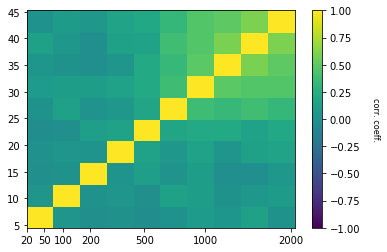

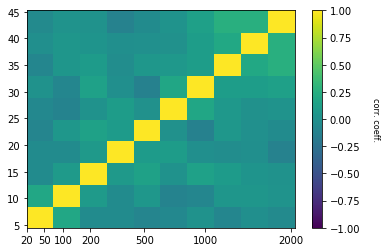

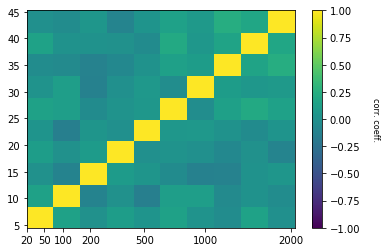

In [4]:
for i in range(3):
    pl.plot_corr(dat[i],mb.bp,spc='p2',clab='corr. coeff.')